In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from time import sleep
import socket,time,requests
from bs4 import BeautifulSoup
import tkinter as tk
from datetime import date




url="https://uzmanpara.milliyet.com.tr/canli-borsa/bist-TUM-hisseleri/"
r=requests.get(url)
soup=BeautifulSoup(r.content,"html.parser")

bs=BeautifulSoup(r.content, "lxml")
data=soup.find("div",{"class":"box box10 last"})
data


<div class="box box10 last" id="acik_koyu_yeri3">
<table border="0" cellpadding="0" cellspacing="0" class="table3">
<tbody>
<tr><th class="left">Menkul</th>
<th class="currency"></th>
<th class="center">Fiyat</th>
<th class="center td2">%</th>
<th class="center td2">Zaman</th>
</tr>
<tr class="zebra" id="h_tr_id_PKART">
<td class="currency"><a href="/borsa/hisse-senetleri/plastikkart-pkart/" target="_blank"><b id="h_b_ad_id_PKART">PKART</b></a></td>
<td class="currency-up" id="h_td_yon_id_PKART"> </td>
<td class="center" id="h_td_fiyat_id_PKART">22,76</td>
<td class="center" id="h_td_yuzde_id_PKART">1,97</td>
<td class="center" id="h_td_zaman_id_PKART">18:09:39</td>
</tr>
<tr class="zebra" id="h_tr_id_PKENT">
<td class="currency"><a href="/borsa/hisse-senetleri/petrokent-turizm-pkent/" target="_blank"><b id="h_b_ad_id_PKENT">PKENT</b></a></td>
<td class="currency-up" id="h_td_yon_id_PKENT"> </td>
<td class="center" id="h_td_fiyat_id_PKENT">114,60</td>
<td class="center" id="h_td_yuzde_

In [434]:
data=soup.find("tr",{"id":"h_tr_id_SASA"})


In [435]:
data=soup.find("td",{"id":"h_td_fiyat_id_SASA"})
text=data.text

In [436]:
text=text.replace(',', '.')
text=float(text)
text

55.5

In [52]:
sasa=pd.read_csv("/Users/Bora/Documents/GitHub/Borsa-Hisse-Analizi/SASA.csv")
sasa.index=pd.to_datetime(sasa["Date"])


In [53]:
del sasa["Date"]

In [54]:
sasa=pd.DataFrame(sasa)

In [55]:
sasa

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-01-04,3.328,3.274,3.361,3.267,41.61M,2.18%
2021-01-05,3.290,3.319,3.361,3.232,43.42M,-1.14%
2021-01-06,3.393,3.303,3.419,3.299,60.63M,3.13%
2021-01-07,3.731,3.406,3.731,3.399,113.10M,9.96%
2021-01-08,3.689,3.770,3.802,3.583,149.20M,-1.13%
...,...,...,...,...,...,...
2023-06-12,62.600,66.000,66.450,62.600,47.60M,-4.50%
2023-06-13,56.350,57.600,61.400,56.350,117.63M,-9.98%
2023-06-14,54.950,56.650,57.850,53.400,91.00M,-2.48%


In [56]:
close=pd.DataFrame(sasa["Price"])

close


,Price
Date,
2021-01-04,3.328
2021-01-05,3.290
2021-01-06,3.393
2021-01-07,3.731
2021-01-08,3.689
...,...
2023-06-12,62.600
2023-06-13,56.350
2023-06-14,54.950


In [57]:
dict={'Date':date.today(),'Price':text}
df=pd.DataFrame.from_dict(dict,orient="index")
df=df.T
df.reset_index()
df

NameError: name 'text' is not defined

In [443]:
df.set_index=df["Date"]
df

,Date,Price
0,2023-06-17,55.5


In [444]:
df.index=df["Date"]

In [445]:
del df["Date"]

In [446]:
df.index=pd.to_datetime(df.index)
df

,Price
Date,
2023-06-17,55.5


In [374]:
close=pd.concat([close,df])
close

,Price
Date,
2018-01-02,0.938
2018-01-03,0.957
2018-01-04,0.948
2018-01-05,0.962
2018-01-08,0.983
...,...
2023-06-13,56.35
2023-06-14,54.95
2023-06-15,56.3


In [103]:
rolling_app5=close.rolling(window=5).mean()
rolling_app14=close.rolling(window=7).mean()
rolling_app21=close.rolling(window=15).mean()



In [104]:
MAs=pd.concat([close,rolling_app5,rolling_app14,rolling_app21],axis=1)
MAs.columns=["Close","short","mid","long"]


In [105]:
MAs.dropna(axis=0,inplace=True)
MAs

,Close,short,mid,long
Date,,,,
2021-01-22,4.031,4.0592,3.982000,3.783067
2021-01-25,4.044,4.0844,4.024857,3.830800
2021-01-26,4.256,4.1256,4.085143,3.895200
2021-01-27,3.928,4.0766,4.086571,3.930867
2021-01-28,4.221,4.0960,4.111000,3.963533
...,...,...,...,...
2023-06-12,62.600,65.3400,64.071429,57.621333
2023-06-13,56.350,63.3400,63.835714,58.044667
2023-06-14,54.950,61.0700,62.571429,58.331333


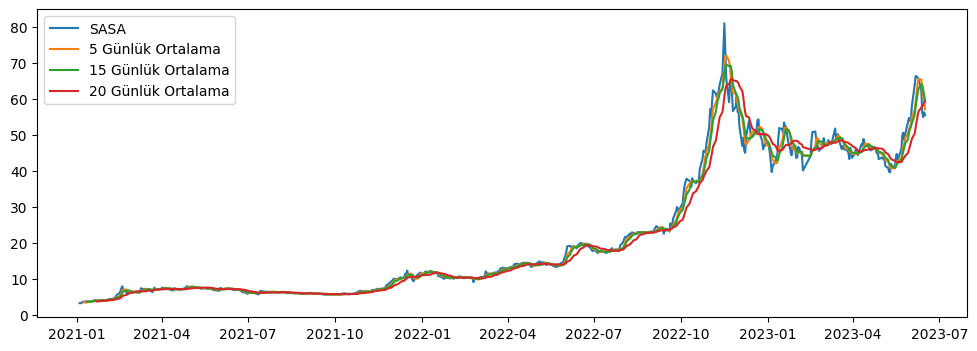

In [106]:
fig,ax=plt.subplots(figsize=(12,4))
ax.plot(close.index,close,label='SASA')
ax.plot(rolling_app5.index,rolling_app5,label='5 Günlük Ortalama')
ax.plot(rolling_app14.index,rolling_app14,label='15 Günlük Ortalama')
ax.plot(rolling_app21.index,rolling_app21,label='20 Günlük Ortalama')
ax.legend(loc='upper left')


In [107]:
def buy_sell(data,perc=50):
    buy_sell=[]
    buy_signal=[]
    sell_signal=[]
    flag=42

    sm=np.abs(np.percentile(np.array(data["short"]-data["mid"]),perc))
    sl=np.abs(np.percentile(np.array(data["short"]-data["long"]),perc))

    for i in range(0,len(data)):
        if (data["short"][i]>data["mid"][i]+sm) & (data["short"][i]>data["long"][i]+sl):
            buy_signal.append(np.nan)
            if flag !=1:
                sell_signal.append(data["Close"][i])
                buy_sell.append(data["Close"][i])
                flag=1
            else:
                sell_signal.append(np.nan)
        elif (data["short"][i]<data["mid"][i]-sm)&(data["short"][i]<data["long"][i]-sl):
            sell_signal.append(np.nan)
            if flag!=0:
                buy_signal.append(data["Close"][i])
                buy_sell.append(-data["Close"][i])
                flag=0
            else:
                buy_signal.append(np.nan)
        else:
            buy_sell.append(np.nan)
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)

    operations=np.array(buy_sell)
    operations=operations[~np.isnan(operations)]

    neg=0
    pos=0

    for i in range(len(operations)):
        if operations[i]<0:
            neg=i
            break
    for i in range(1,len(operations)):
        if operations[-i]>0:
            pos=i-1
            break
    operations=operations[neg:-pos]
    PL=np.sum(operations)

    return (buy_signal,sell_signal,PL)


In [108]:
m=buy_sell(MAs)
MAs["Al"]=m[0]
MAs["Sat"]=m[1]

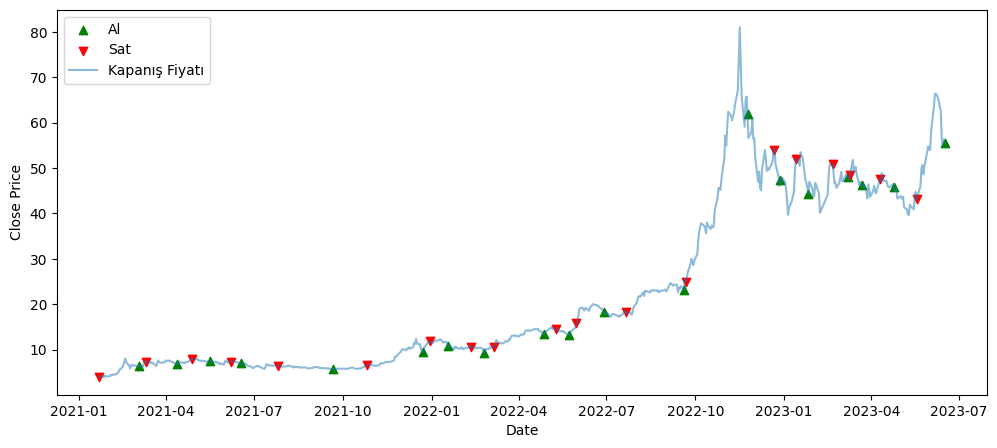

In [109]:
plt.figure(figsize=(12,5))
plt.scatter(MAs.index,MAs["Al"],color="green",label='Al',marker='^',alpha=1)
plt.scatter(MAs.index,MAs["Sat"],color="red",label='Sat',marker='v',alpha=1)
plt.plot(MAs["Close"],label='Kapanış Fiyatı',alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(loc='upper left')
plt.show()

In [110]:
al=MAs["Al"]
al=al.dropna(axis=0)
al

Date
2021-03-04     6.412
2021-04-13     6.818
2021-05-17     7.535
2021-06-18     7.004
2021-09-21     5.657
2021-12-23     9.409
2022-01-18    10.765
2022-02-24     9.152
2022-04-27    13.511
2022-05-23    13.330
2022-06-28    18.400
2022-09-19    23.217
2022-11-24    61.913
2022-12-28    47.348
2023-01-26    44.348
2023-03-08    47.913
2023-03-22    46.217
2023-04-25    45.739
2023-06-16    55.500
Name: Al, dtype: float64

In [111]:
del al["2023-06-16"]

In [113]:
sat=MAs["Sat"]
sat=sat.dropna(axis=0)
sat


Date
2021-01-22     4.031
2021-03-11     7.234
2021-04-28     7.913
2021-06-07     7.343
2021-07-26     6.452
2021-10-26     6.657
2021-12-30    11.837
2022-02-11    10.652
2022-03-07    10.643
2022-05-10    14.539
2022-05-31    15.861
2022-07-21    18.261
2022-09-21    24.957
2022-12-21    54.044
2023-01-13    51.957
2023-02-20    50.957
2023-03-10    48.435
2023-04-10    47.522
2023-05-18    43.109
Name: Sat, dtype: float64

In [114]:
del sat["2021-01-22"]


In [115]:
sat_val=sat.values
al_val=al.values


In [116]:
sat_val1=sat_val

In [117]:
sat_val1

array([ 7.234,  7.913,  7.343,  6.452,  6.657, 11.837, 10.652, 10.643,
       14.539, 15.861, 18.261, 24.957, 54.044, 51.957, 50.957, 48.435,
       47.522, 43.109])

In [118]:
al_val1=al_val
al_val1

array([ 6.412,  6.818,  7.535,  7.004,  5.657,  9.409, 10.765,  9.152,
       13.511, 13.33 , 18.4  , 23.217, 61.913, 47.348, 44.348, 47.913,
       46.217, 45.739])

In [119]:
res=[]

for i in range(18):
    res.append((sat_val1[i]/al_val1[i]))

In [120]:
df=pd.DataFrame()
df["Kar"]=res
df

,Kar
0,1.128197
1,1.160604
2,0.974519
3,0.921188
4,1.176772
5,1.258051
6,0.989503
7,1.162915
8,1.076086
9,1.189872


In [121]:
res0=[100]
for i in range(18):
    res0.append(res0[i]*df["Kar"].loc[i])


In [122]:
df["Eldeki Para"]=res0[1:]
df

,Kar,Eldeki Para
0,1.128197,112.819713
1,1.160604,130.939042
2,0.974519,127.602573
3,0.921188,117.545945
4,1.176772,138.324794
5,1.258051,174.019618
6,0.989503,172.192937
7,1.162915,200.245785
8,1.076086,215.481717
9,1.189872,256.395762


In [123]:
karlilik=df["Eldeki Para"].iloc[-1]/df["Eldeki Para"].iloc[0]
karlilik=(karlilik-1)*100
print("Karlılık oranı %",karlilik)

Karlılık oranı % 161.4188633995049


## Her sat tavsiyesinde satmayıp 5.sat tavsiyesinde satarsak ne olur?(Yani 4 adet sat tavsiyesini pas geçersek)

In [17]:
sat_val2=sat_val[4:28:5]

In [18]:
sat_val2

array([ 1.053,  1.413,  6.452, 14.661, 51.565])

In [19]:
al_val2=al_val[0:25:5]
al_val2

array([ 0.889,  0.955,  2.009,  6.239, 13.93 ])

In [20]:
res1=[]

for i in range(5):
    res1.append((sat_val2[i]/al_val2[i]))

In [21]:
df1=pd.DataFrame()
df1["Kar"]=res1
df1

,Kar
0,1.184477
1,1.479581
2,3.211548
3,2.349896
4,3.701723


In [32]:
res2=[100]
for i in range(5):
    res2.append(res2[i]*df1["Kar"].loc[i])




In [34]:
df1["Eldeki Para"]=res2[1:]
df1


,Kar,Eldeki Para
0,1.184477,118.447694
1,1.479581,175.252976
2,3.211548,562.833349
3,2.349896,1322.599733
4,3.701723,4895.897718


In [38]:
karlilik=df1["Eldeki Para"].iloc[-1]/df1["Eldeki Para"].iloc[0]
karlilik=(karlilik-1)*100
print("Karlılık oranı %",karlilik)

Karlılık oranı % 4033.3837334440454
